In [1]:
import os
from matplotlib.colors import ListedColormap, BoundaryNorm

In [2]:
os.getcwd()

'E:\\SunflowerStarArchive\\sunflower-star-archive-tools\\src'

In [3]:
import torch
print(torch.__version__)
# check if CUDA is available
print(torch.cuda.is_available())
# check device
print(torch.cuda.current_device())

2.0.1+cu117
True
0


In [4]:
import datetime

date_txt = datetime.datetime.now().strftime('%Y-%m-%d-%H-%M')

dst_data_dir = os.path.join('..', 'data', 'sea-star-re-id_event-unaware_training-split_' + date_txt)

if not os.path.exists(dst_data_dir):
    os.makedirs(dst_data_dir)

dst_data_dir

'..\\data\\sea-star-re-id_event-unaware_training-split_2024-04-17-07-09'

In [5]:
import ultralytics
print(ultralytics.__version__)
print(ultralytics.checks())
from ultralytics import YOLO
path_model = os.path.join('..', 'models', 'yolov8', 'sunflowerstarseg-4-20240402', 'train', 'weights', 'best.pt')
model = YOLO(path_model)
print(model)

Ultralytics YOLOv8.0.59  Python-3.11.2 torch-2.0.1+cu117 CUDA:0 (NVIDIA RTX A6000, 49140MiB)
Setup complete  (64 CPUs, 1023.6 GB RAM, 3691.8/16764.0 GB disk)
WARNING  ..\models\yolov8\sunflowerstarseg-4-20240402\train\weights\best.pt appears to require 'ultralytics.nn.modules.conv', which is not in ultralytics requirements.
AutoInstall will run now for 'ultralytics.nn.modules.conv' but this feature will be removed in the future.
Recommend fixes are to train a new model using the latest 'ultralytics' package or to run a command with an official YOLOv8 model, i.e. 'yolo predict model=yolov8n.pt'


None


requirements: YOLOv8 requirement "ultralytics.nn.modules.conv" not found, attempting AutoUpdate...
requirements:  Command 'pip install "ultralytics.nn.modules.conv"  ' returned non-zero exit status 1.


ModuleNotFoundError: No module named 'ultralytics.nn.modules.conv'; 'ultralytics.nn.modules' is not a package

In [175]:
yolo_classes = list(model.names.values())
classes_ids = [yolo_classes.index(clas) for clas in yolo_classes]

yolo_classes, classes_ids

(['Other_species', 'Pycnopodia_helianthoides'], [0, 1])

In [176]:
## magenta
color_other_species = (255, 0, 255)
## blue
color_pycnopodia = (255, 0, 0)
colors = [color_other_species, color_pycnopodia]
colors

[(255, 0, 255), (255, 0, 0)]

In [177]:
import glob
src_data_root = r'C:\Users\wlwee\OneDrive\Desktop\sorted_stars'
src_image_files = glob.glob(os.path.join(src_data_root, '*', '*', '*', '*.*'))

for image_file in src_image_files[:5]:
    print(image_file)
    group_code = os.path.basename(os.path.dirname(os.path.dirname(os.path.dirname(image_file))))
    id_code = os.path.basename(os.path.dirname(os.path.dirname(image_file))) + '__' + group_code
    event_code = os.path.basename(os.path.dirname(image_file))
    print(f'\tgroup_code: {group_code}')
    print(f'\tid_code: {id_code}')
    print(f'\tevent_code: {event_code}')

print()
print(f'Total number of images: {len(src_image_files)}')


C:\Users\wlwee\OneDrive\Desktop\sorted_stars\ADULT_FHL_STARS\akihito\6_10_2022_star_card_and_stars_in_residence\Akihito.jpg
	group_code: ADULT_FHL_STARS
	id_code: akihito__ADULT_FHL_STARS
	event_code: 6_10_2022_star_card_and_stars_in_residence
C:\Users\wlwee\OneDrive\Desktop\sorted_stars\ADULT_FHL_STARS\akihito\6_10_2022_star_card_and_stars_in_residence\Akihito_2.png
	group_code: ADULT_FHL_STARS
	id_code: akihito__ADULT_FHL_STARS
	event_code: 6_10_2022_star_card_and_stars_in_residence
C:\Users\wlwee\OneDrive\Desktop\sorted_stars\ADULT_FHL_STARS\charlotte\6_10_2022_star_card_and_stars_in_residence\CharlottePHOTO2.jpg
	group_code: ADULT_FHL_STARS
	id_code: charlotte__ADULT_FHL_STARS
	event_code: 6_10_2022_star_card_and_stars_in_residence
C:\Users\wlwee\OneDrive\Desktop\sorted_stars\ADULT_FHL_STARS\charlotte\6_10_2022_star_card_and_stars_in_residence\Muddy.jpg
	group_code: ADULT_FHL_STARS
	id_code: charlotte__ADULT_FHL_STARS
	event_code: 6_10_2022_star_card_and_stars_in_residence
C:\Users

In [178]:
id_codes = []
image_events = []
group_codes = []
for image_file in src_image_files:
    group_code = os.path.basename(os.path.dirname(os.path.dirname(os.path.dirname(image_file))))
    id_code = os.path.basename(os.path.dirname(os.path.dirname(image_file))) + '__' + group_code
    event_code = os.path.basename(os.path.dirname(image_file))

    id_codes.append(id_code)
    image_events.append(event_code)
    group_codes.append(group_code)

import pandas as pd
df = pd.DataFrame({'id_code': id_codes, 'group_code': group_codes, 'event_code': image_events, 'image_file': src_image_files})
df.head()

id_code       group_code  \
0    akihito__ADULT_FHL_STARS  ADULT_FHL_STARS   
1    akihito__ADULT_FHL_STARS  ADULT_FHL_STARS   
2  charlotte__ADULT_FHL_STARS  ADULT_FHL_STARS   
3  charlotte__ADULT_FHL_STARS  ADULT_FHL_STARS   
4    clooney__ADULT_FHL_STARS  ADULT_FHL_STARS   

                                   event_code  \
0  6_10_2022_star_card_and_stars_in_residence   
1  6_10_2022_star_card_and_stars_in_residence   
2  6_10_2022_star_card_and_stars_in_residence   
3  6_10_2022_star_card_and_stars_in_residence   
4  6_10_2022_star_card_and_stars_in_residence   

                                          image_file  
0  C:\Users\wlwee\OneDrive\Desktop\sorted_stars\A...  
1  C:\Users\wlwee\OneDrive\Desktop\sorted_stars\A...  
2  C:\Users\wlwee\OneDrive\Desktop\sorted_stars\A...  
3  C:\Users\wlwee\OneDrive\Desktop\sorted_stars\A...  
4  C:\Users\wlwee\OneDrive\Desktop\sorted_stars\A...

In [179]:
df.shape

(7053, 4)

In [180]:
## randomly sample 5 rows from df
df_random = df.copy().sample(2)
df_random

id_code                  group_code  \
2754  d2z2__lab_stars_pycno_deployment  lab_stars_pycno_deployment   
1344  b2z2__lab_stars_pycno_deployment  lab_stars_pycno_deployment   

             event_code                                         image_file  
2754  8_29_2023_WW_PICS  C:\Users\wlwee\OneDrive\Desktop\sorted_stars\l...  
1344  8_29_2023_WW_PICS  C:\Users\wlwee\OneDrive\Desktop\sorted_stars\l...

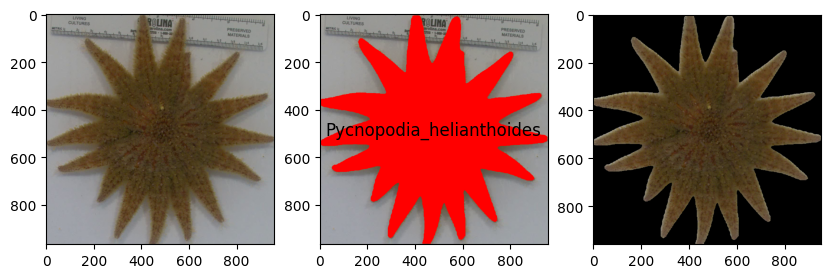

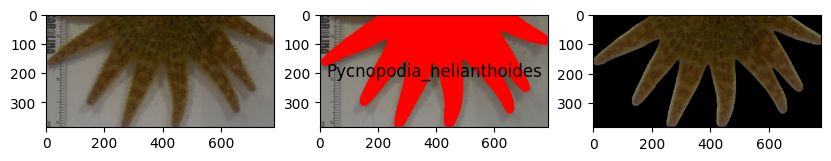

In [181]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

conf = 0.25

for _, row in df_random.iterrows():
    image_file = row['image_file']
    image = cv2.imread(image_file)

    results = model(image, conf=conf, device=0, verbose=False)

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    fig, axs = plt.subplots(1, 3, figsize=(10, 5))

    ax = axs[0]
    ax.imshow(image)

    ax = axs[1]
    image_copy = image.copy()

    mask_areas = []
    object_ids = []
    masks = []
    for result in results:
        if result.masks is None:
            print('No masks found')
            continue

        for mask, box in zip(result.masks.xy, result.boxes):
            points = np.int32([mask])
            color_number = classes_ids.index(int(box.cls[0]))
            color = colors[color_number]
            cv2.fillPoly(image_copy, points, color)

            mask_area = cv2.contourArea(points)
            mask_areas.append(mask_area)
            object_id = yolo_classes[int(box.cls[0].item())]
            object_ids.append(object_id)

            masks.append(mask)

            xyxy = box.xyxy[0].tolist()
            xm, ym = (xyxy[0] + xyxy[2]) / 2, (xyxy[1] + xyxy[3]) / 2
            ax.text(xm, ym, object_id, fontsize=12, color='black', ha='center', va='center')

    ax.imshow(image_copy)

    ax = axs[2]

    ## get the index of largest mask area where the object_id is 'Pycnopodia_helianthoides'
    indexes = [i for i, x in enumerate(object_ids) if x == 'Pycnopodia_helianthoides']
    if len(indexes) > 0:
        index = indexes[np.argmax([mask_areas[i] for i in indexes])]
        mask = masks[index]
        ## mask and crop the raw image using the mask so that we can only see the object of interest
        mask = np.int32([mask])
        mask_image = np.zeros_like(image)
        cv2.fillPoly(mask_image, mask, (255, 255, 255))
        ## apply the mask to the raw image
        mask_image = cv2.bitwise_and(image, mask_image)
        ## crop the raw image using the mask
        x, y, w, h = cv2.boundingRect(mask)
        mask_image = mask_image[y:y+h, x:x+w]

        ax.imshow(mask_image)

    else:
        ax.axis('off')

    plt.show(fig)
    plt.close(fig)

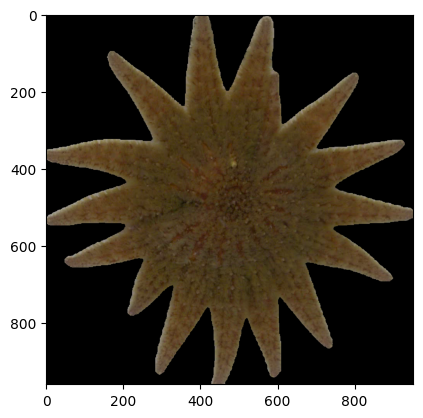

In [182]:
def process_image_file (image_file):
    image = cv2.imread(image_file)
    results = model(image, conf=conf, device=0, verbose=False)
    try:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    except Exception as e:
        print(e, image_file)
        return None

    mask_areas = []
    object_ids = []
    masks = []
    for result in results:
        if result.masks is None:
            continue

        for mask, box in zip(result.masks.xy, result.boxes):
            points = np.int32([mask])
            mask_area = cv2.contourArea(points)
            mask_areas.append(mask_area)
            object_id = yolo_classes[int(box.cls[0].item())]
            object_ids.append(object_id)

            masks.append(mask)

    ## get the index of largest mask area where the object_id is 'Pycnopodia_helianthoides'
    indexes = [i for i, x in enumerate(object_ids) if x == 'Pycnopodia_helianthoides']
    if len(indexes) > 0:
        index = indexes[np.argmax([mask_areas[i] for i in indexes])]
        mask = masks[index]
        ## mask and crop the raw image using the mask so that we can only see the object of interest
        mask = np.int32([mask])
        mask_image = np.zeros_like(image)
        cv2.fillPoly(mask_image, mask, (255, 255, 255))
        ## apply the mask to the raw image
        mask_image = cv2.bitwise_and(image, mask_image)
        ## crop the raw image using the mask
        x, y, w, h = cv2.boundingRect(mask)
        mask_image = mask_image[y:y+h, x:x+w]
        return mask_image
    else:
        return None

mask_image = process_image_file(df_random.iloc[0]['image_file'])
plt.imshow(mask_image)

In [183]:
from sklearn.model_selection import train_test_split

unique_id_codes = df['id_code'].unique()

train_dfs = []
test_dfs = []

for id_code in unique_id_codes[:]:
    df_id_code = df[df['id_code'] == id_code]
    print(f'id_code: {id_code}', f'number of images: {len(df_id_code)}')

    if len(df_id_code) < 2:
        print(f'\t WARNING id_code: {id_code}', f'number of images: {len(df_id_code)}')
        continue

    df_train, df_test = train_test_split(df_id_code, test_size=0.2)

    if len(df_train) > 1:
        train_dfs.append(df_train)
        test_dfs.append(df_test)
        print(f'\ttrain: {len(df_train)}', f'test: {len(df_test)}')
    else:
        df_train, df_test = train_test_split(df_id_code, test_size=0.2)
        if len(df_train) > 1:
            train_dfs.append(df_train)
            test_dfs.append(df_test)
            print(f'\tREROLL train: {len(df_train)}', f'test: {len(df_test)}')
        else:
            print(f'\tWARNING id_code: {id_code}', f'number of images: {len(df_id_code)}')

## concatenate the dataframes
df_train = pd.concat(train_dfs)
df_test = pd.concat(test_dfs)

print()

print(f'df_train: {df_train.shape}')
print(f'df_test: {df_test.shape}')


id_code: akihito__ADULT_FHL_STARS number of images: 2
	WARNING id_code: akihito__ADULT_FHL_STARS number of images: 2
id_code: charlotte__ADULT_FHL_STARS number of images: 2
	WARNING id_code: charlotte__ADULT_FHL_STARS number of images: 2
id_code: clooney__ADULT_FHL_STARS number of images: 3
	train: 2 test: 1
id_code: crocus__ADULT_FHL_STARS number of images: 4
	train: 3 test: 1
id_code: deep_blue__ADULT_FHL_STARS number of images: 3
	train: 2 test: 1
id_code: evan__ADULT_FHL_STARS number of images: 4
	train: 3 test: 1
id_code: fulgens__ADULT_FHL_STARS number of images: 4
	train: 3 test: 1
id_code: gaucho__ADULT_FHL_STARS number of images: 28
	train: 22 test: 6
id_code: harriet__ADULT_FHL_STARS number of images: 30
	train: 24 test: 6
id_code: isabella__ADULT_FHL_STARS number of images: 3
	train: 2 test: 1
id_code: kumquat__ADULT_FHL_STARS number of images: 4
	train: 3 test: 1
id_code: loquat__ADULT_FHL_STARS number of images: 4
	train: 3 test: 1
id_code: martha__ADULT_FHL_STARS number o

In [184]:
from tqdm import tqdm

def process_df (df, df_dir, target_size=(512, 512)):

    print(f'Processing {len(df)} images')

    if not os.path.exists(df_dir):
        print(f'Creating directory: {df_dir}')
        os.makedirs(df_dir)

    n_images_per_id = {}

    path_processed_images = []

    masked_images = []

    pbar = tqdm(total=len(df), desc='Processing images', position=0, leave=True)
    for _, row in df.iterrows():
        id_code = row['id_code']
        id_dir = os.path.join(df_dir, id_code)
        if not os.path.exists(id_dir):
            os.makedirs(id_dir)

        image_file = row['image_file']
        mask_image = process_image_file(image_file)
        if mask_image is not None:
            mask_image_file = os.path.join(id_dir, os.path.basename(image_file))
            mask = cv2.cvtColor(mask_image, cv2.COLOR_RGB2BGR)
            if target_size is not None:
                mask = cv2.resize(mask, target_size)

            cv2.imwrite(mask_image_file, mask)
            path_processed_images.append(mask_image_file)
            masked_images.append(mask)

            if id_code in n_images_per_id:
                n_images_per_id[id_code] += 1
            else:
                n_images_per_id[id_code] = 1
        else:
            masked_images.append(None)

        pbar.update(1)

    pbar.close()

    return n_images_per_id, path_processed_images, masked_images

train_dir = os.path.join(dst_data_dir, 'train')
n_images_per_id_train, path_train_images, masked_train_images = process_df(df_train, train_dir)

test_dir = os.path.join(dst_data_dir, 'test')
n_images_per_id_test, path_test_images, masked_test_images = process_df(df_test, test_dir)


Processing 5521 images
Creating directory: ..\data\training-split_2024-04-12-21-31\train


Processing images:   4%|▎         | 202/5521 [01:17<24:44,  3.58it/s]

OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'



Processing images: 100%|██████████| 5521/5521 [20:00<00:00,  4.60it/s]


Processing 1506 images
Creating directory: ..\data\training-split_2024-04-12-21-31\test


Processing images: 100%|██████████| 1506/1506 [05:36<00:00,  4.47it/s]


In [185]:
df_train['masked_image'] = masked_train_images
df_test['masked_image'] = masked_test_images

## drop rows with None values
df_train = df_train.dropna()
df_test = df_test.dropna()

masked_train_images = np.array([img for img in df_train['masked_image']])
masked_test_images = np.array([img for img in df_test['masked_image']])

## append the test and train images into one longer array
masked_images = np.concatenate([masked_train_images, masked_test_images])

In [195]:
## remake df by concatenating the train and test dataframes
df = pd.concat([df_train, df_test])
df.shape

(6877, 5)

In [190]:
## fit PCA to masked images
from sklearn.decomposition import PCA

n_components = 1000

pca = PCA(n_components=n_components)
pca.fit(masked_images.reshape(-1, np.prod(masked_images.shape[1:])))

print(pca.explained_variance_ratio_.sum())


0.8308296525331254


In [191]:
pcs = pca.transform(masked_images.reshape(-1, np.prod(masked_images.shape[1:])))
pcs.shape

In [196]:
df['pcs'] = list(pcs)
del masked_images

id_code       group_code  \
5   clooney__ADULT_FHL_STARS  ADULT_FHL_STARS   
4   clooney__ADULT_FHL_STARS  ADULT_FHL_STARS   
10   crocus__ADULT_FHL_STARS  ADULT_FHL_STARS   
9    crocus__ADULT_FHL_STARS  ADULT_FHL_STARS   
8    crocus__ADULT_FHL_STARS  ADULT_FHL_STARS   

                                    event_code  \
5   6_10_2022_star_card_and_stars_in_residence   
4   6_10_2022_star_card_and_stars_in_residence   
10  6_10_2022_star_card_and_stars_in_residence   
9   6_10_2022_star_card_and_stars_in_residence   
8   6_10_2022_star_card_and_stars_in_residence   

                                           image_file  \
5   C:\Users\wlwee\OneDrive\Desktop\sorted_stars\A...   
4   C:\Users\wlwee\OneDrive\Desktop\sorted_stars\A...   
10  C:\Users\wlwee\OneDrive\Desktop\sorted_stars\A...   
9   C:\Users\wlwee\OneDrive\Desktop\sorted_stars\A...   
8   C:\Users\wlwee\OneDrive\Desktop\sorted_stars\A...   

                                         masked_image  \
5   [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...   
4   [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...   
10  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...   
9   [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...   
8   [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...   

                                                  pcs  
5   [12109.964576181717, 5791.917302911851, -5407....  
4   [10828.152483946, 4758.508772020785, 17046.495...  
10  [16845.367027190252, 11319.540467375462, -9959...  
9   [1862.6196858527198, 11568.47349075032, -10294...  
8   [17486.185595609175, 4425.927310594211, -8928....

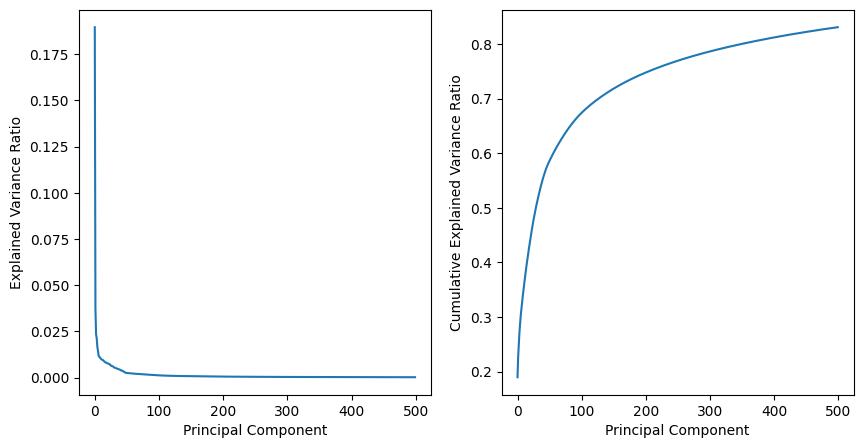

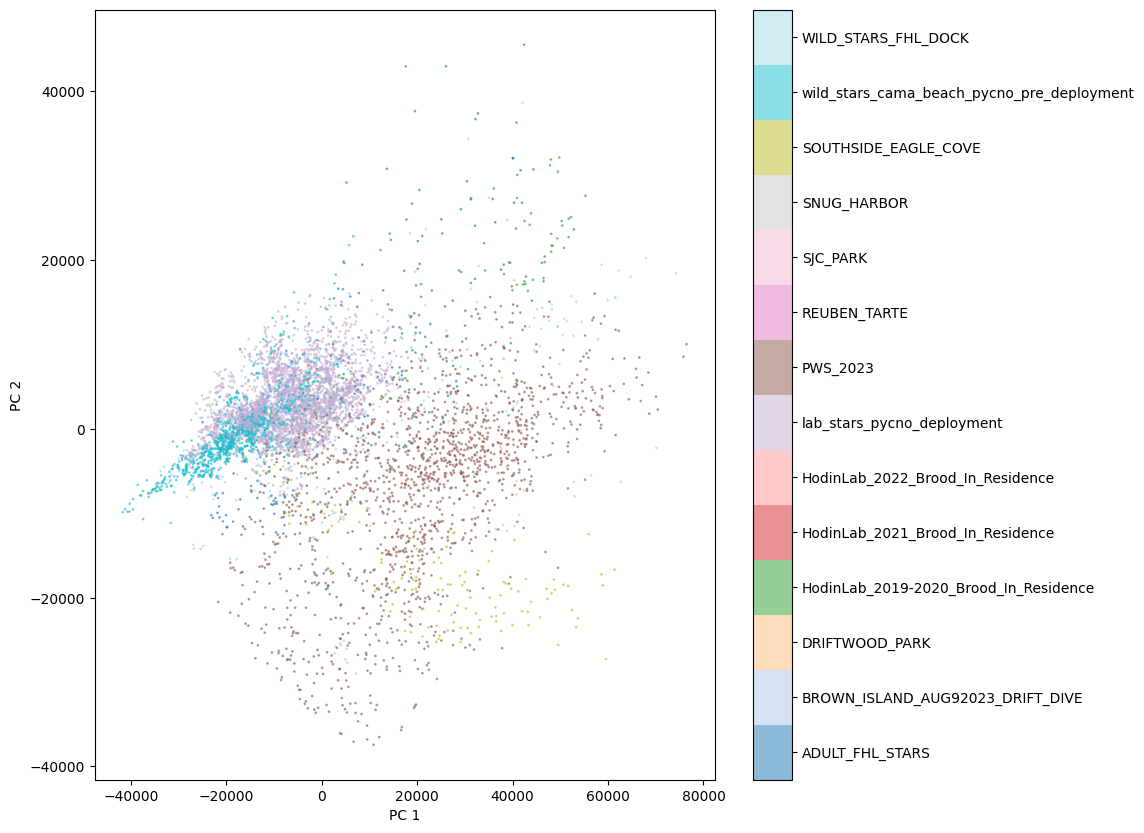

In [235]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

ax = axs[0]
ax.plot(pca.explained_variance_ratio_)
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance Ratio')

ax = axs[1]
ax.plot(np.cumsum(pca.explained_variance_ratio_))
ax.set_xlabel('Principal Component')
ax.set_ylabel('Cumulative Explained Variance Ratio')

path_plot = os.path.join(dst_data_dir, 'pca_explained_variance_plot.png')
dpi = 300
fig.savefig(path_plot, dpi=dpi, bbox_inches='tight')

plt.show(fig)
plt.close(fig)

## plot first 2 principal components as scatter plot
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

pc1 = pcs[:, 0]
pc2 = pcs[:, 1]

# Create a dictionary mapping group codes to a unique integer
group_codes = df['group_code'].unique()
group_codes_int_dict = {code: i for i, code in enumerate(group_codes)}
group_codes_int = df['group_code'].map(group_codes_int_dict).values

# Get the list of colors, then create a custom colormap
cm_colors = plt.cm.tab20(np.linspace(0, 1, len(group_codes)))
cmap_custom = ListedColormap(cm_colors)

# Create the scatter plot with the custom colormap
scatter = ax.scatter(pc1, pc2, c=group_codes_int, s=1, alpha=0.5, cmap=cmap_custom)

# Define boundaries for each color and create a colorbar
bounds = np.arange(len(group_codes)+1) - 0.5
norm = BoundaryNorm(bounds, cmap_custom.N)
cbar = fig.colorbar(scatter, boundaries=bounds, ticks=np.arange(len(group_codes)), spacing='proportional', norm=norm)

# Assign the group code labels to the colorbar ticks
cbar.ax.set_yticklabels(group_codes)

# Set the labels for the axes
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')

# Save the plot
path_plot = os.path.join(dst_data_dir, 'pca_space_plot.png')
dpi = 300
fig.savefig(path_plot, dpi=dpi, bbox_inches='tight')

plt.show()
plt.close(fig)

Plotting images: 100%|██████████| 6877/6877 [02:37<00:00, 43.79it/s]


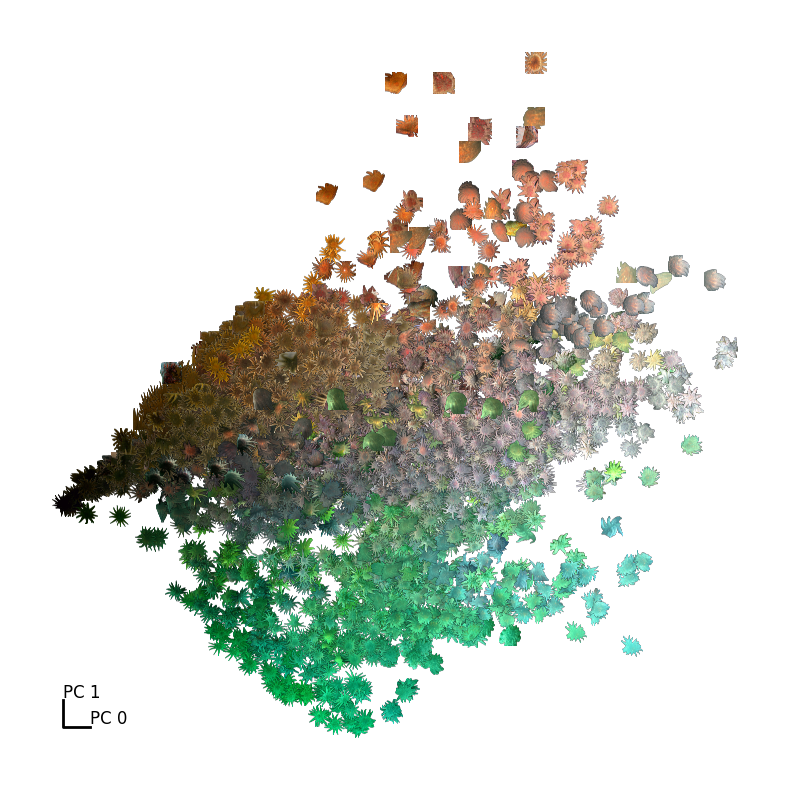

In [207]:
fig, ax = plt.subplots(figsize=(15, 15))

## visualize image space with inset images
K = 25 ## space strech factor

W = 512
H = 512

eW = W / K**2
eH = H / K**2

lim_pad = 2

pc1_norm = (pc1 - pc1.min()) / (pc1.max() - pc1.min())*K
pc2_norm = (pc2 - pc2.min()) / (pc2.max() - pc2.min())*K

path_plot = os.path.join(dst_data_dir, 'pca_space_images_plot.png')
dpi = 600

pbar = tqdm(total=len(df), desc='Plotting images', position=0, leave=True)
for i, image in enumerate(df['masked_image']):
    x = pc1_norm[i]
    y = pc2_norm[i]

    extent = [x - eW / 2, x + eW / 2, y - eH / 2, y + eH / 2]

    # reshape to (W, H, 3)
    image = image.reshape(W, H, 3)

    # Convert your RGB image to RGBA
    image_w_alpha = cv2.cvtColor(image, cv2.COLOR_RGB2BGRA)
    # Set the alpha channel to 0 where all the R, G, and B channels are 0
    image_w_alpha[..., 3] = np.where(np.all(image_w_alpha[..., :3] == 0, axis=-1), 0, 255).astype(np.uint8)
    # Now, plot the image with transparency
    ax.imshow(image_w_alpha, extent=extent, origin='lower', zorder=1)

    ax.scatter(x, y, c='r', s=1, zorder=0)

    pbar.update(1)

pbar.close()

p_x = [0, 0, 1]
p_y = [1, 0, 0]
ax.plot(p_x, p_y, c='black', linewidth=2)
text = 'PC 0'
ax.text(p_x[-1], p_y[-1]+.1, text, fontsize=12)
text = 'PC 1'
ax.text(p_x[0], p_y[0]+.1, text, fontsize=12)

ax.set_xlim(0-lim_pad, K+lim_pad)
ax.set_ylim(0-lim_pad, K+lim_pad)

ax.axis('off')

ax.set_aspect('equal')

fig.savefig(path_plot, dpi=dpi, bbox_inches='tight')

plt.show()
plt.close()

In [212]:
import umap
n_neighbors = 50
min_dist = 0.1
n_components = 2

embed = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, n_components=n_components, verbose=True).fit_transform(pcs)
embed.shape

UMAP(n_neighbors=50, verbose=True)
Sat Apr 13 11:45:34 2024 Construct fuzzy simplicial set
Sat Apr 13 11:45:34 2024 Finding Nearest Neighbors
Sat Apr 13 11:45:34 2024 Building RP forest with 9 trees
Sat Apr 13 11:45:38 2024 NN descent for 13 iterations
	 1  /  13
	 2  /  13
	 3  /  13
	 4  /  13
	Stopping threshold met -- exiting after 4 iterations
Sat Apr 13 11:45:50 2024 Finished Nearest Neighbor Search
Sat Apr 13 11:45:53 2024 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Sat Apr 13 11:46:03 2024 Finished embedding


(6877, 2)

In [237]:
df['umap'] = list(embed)

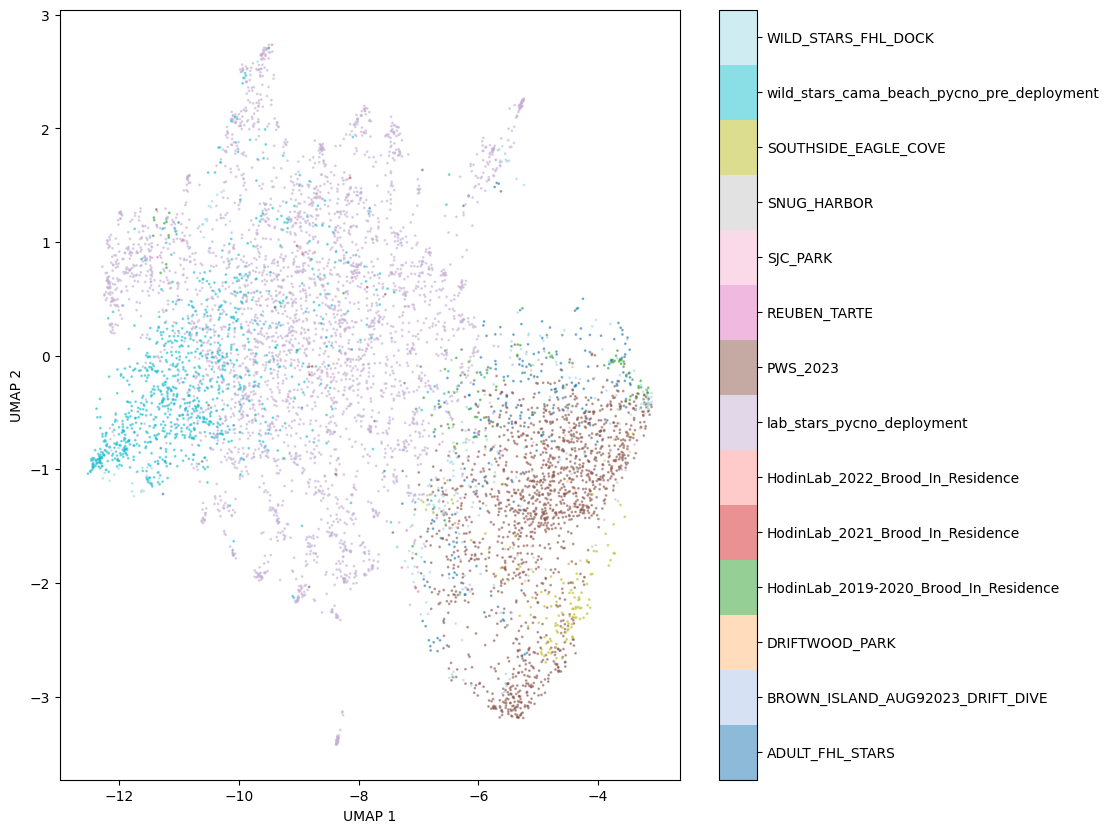

In [242]:
u1 = embed[:, 0]
u2 = embed[:, 1]

# Create a dictionary mapping group codes to a unique integer
group_codes = df['group_code'].unique()
group_codes_int_dict = {code: i for i, code in enumerate(group_codes)}
group_codes_int = df['group_code'].map(group_codes_int_dict).values

# Get the list of colors, then create a custom colormap
cm_colors = plt.cm.tab20(np.linspace(0, 1, len(group_codes)))
cmap_custom = ListedColormap(cm_colors)

fig, ax = plt.subplots(figsize=(10,10))

# Create the scatter plot with the custom colormap
scatter = ax.scatter(u1, u2, c=group_codes_int, s=1, alpha=0.5, cmap=cmap_custom)

# Define boundaries for each color and create a colorbar
bounds = np.arange(len(group_codes)+1) - 0.5
norm = BoundaryNorm(bounds, cmap_custom.N)
cbar = fig.colorbar(scatter, boundaries=bounds, ticks=np.arange(len(group_codes)), spacing='proportional', norm=norm)

# Assign the group code labels to the colorbar ticks
cbar.ax.set_yticklabels(group_codes)

# Set the labels for the axes
ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')

# Save the plot
path_plot = os.path.join(dst_data_dir, 'umap_space_plot.png')
dpi = 300
fig.savefig(path_plot, dpi=dpi, bbox_inches='tight')

plt.show()
plt.close(fig)

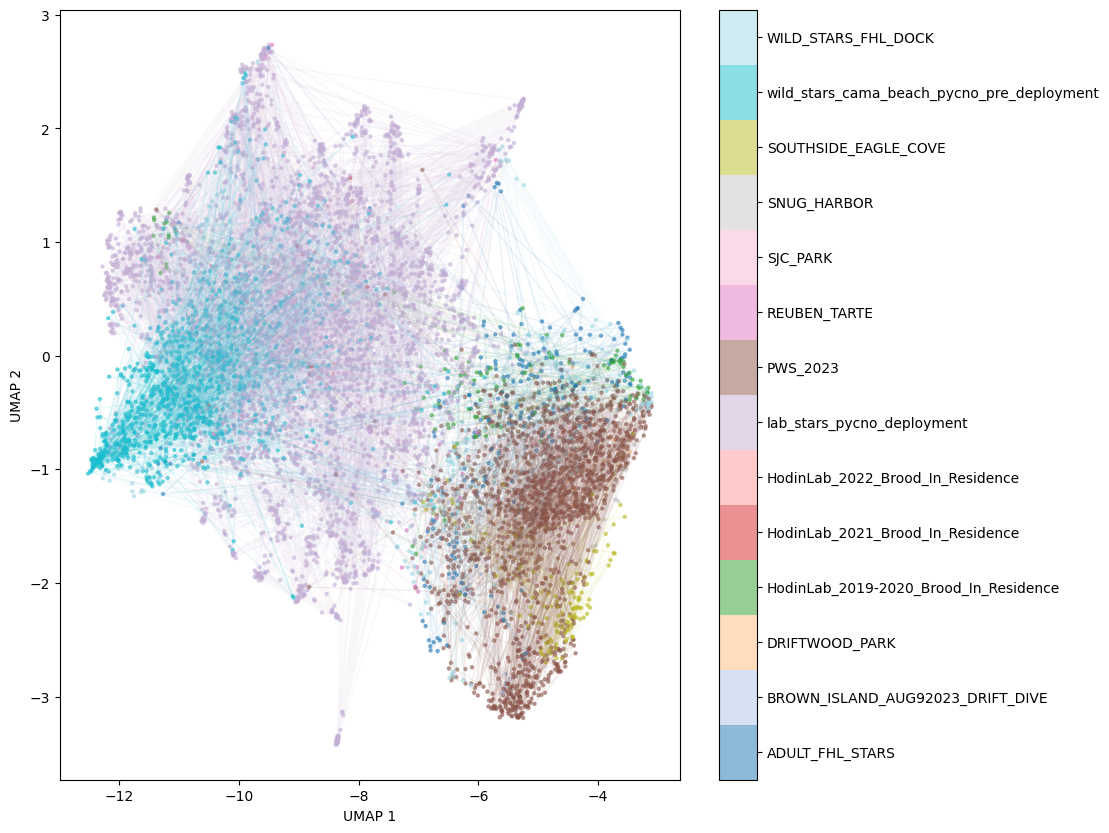

In [244]:
# Create a dictionary mapping group codes to a unique integer
group_codes = df['group_code'].unique()
group_codes_int_dict = {code: i for i, code in enumerate(group_codes)}
group_codes_int = df['group_code'].map(group_codes_int_dict).values

# Get the list of colors, then create a custom colormap
cm_colors = plt.cm.tab20(np.linspace(0, 1, len(group_codes)))
cmap_custom = ListedColormap(cm_colors)

fig, ax = plt.subplots(figsize=(10,10))

for group_code in group_codes:
    color = cm_colors[group_codes_int_dict[group_code]]
    df_tmp = df[df['group_code'] == group_code]
    uniq_id_codes = df_tmp['id_code'].unique()
    for id_code in uniq_id_codes:
        df_id_code = df_tmp[df_tmp['id_code'] == id_code]
        u1 = df_id_code['umap'].apply(lambda x: x[0]).values
        u2 = df_id_code['umap'].apply(lambda x: x[1]).values
        ax.plot(u1, u2, color=color, linewidth=1, alpha=0.1)

u1 = embed[:, 0]
u2 = embed[:, 1]

scatter = ax.scatter(u1, u2, c=group_codes_int, s=5, alpha=0.5, cmap=cmap_custom)

# Define boundaries for each color and create a colorbar
bounds = np.arange(len(group_codes)+1) - 0.5
norm = BoundaryNorm(bounds, cmap_custom.N)
cbar = fig.colorbar(scatter, boundaries=bounds, ticks=np.arange(len(group_codes)), spacing='proportional', norm=norm)

# Assign the group code labels to the colorbar ticks
cbar.ax.set_yticklabels(group_codes)

# Set the labels for the axes
ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')

# Save the plot
path_plot = os.path.join(dst_data_dir, 'umap_space_id_flow_plot.png')
dpi = 300
fig.savefig(path_plot, dpi=dpi, bbox_inches='tight')

plt.show()
plt.close(fig)

Plotting images: 100%|██████████| 6877/6877 [02:34<00:00, 44.45it/s]


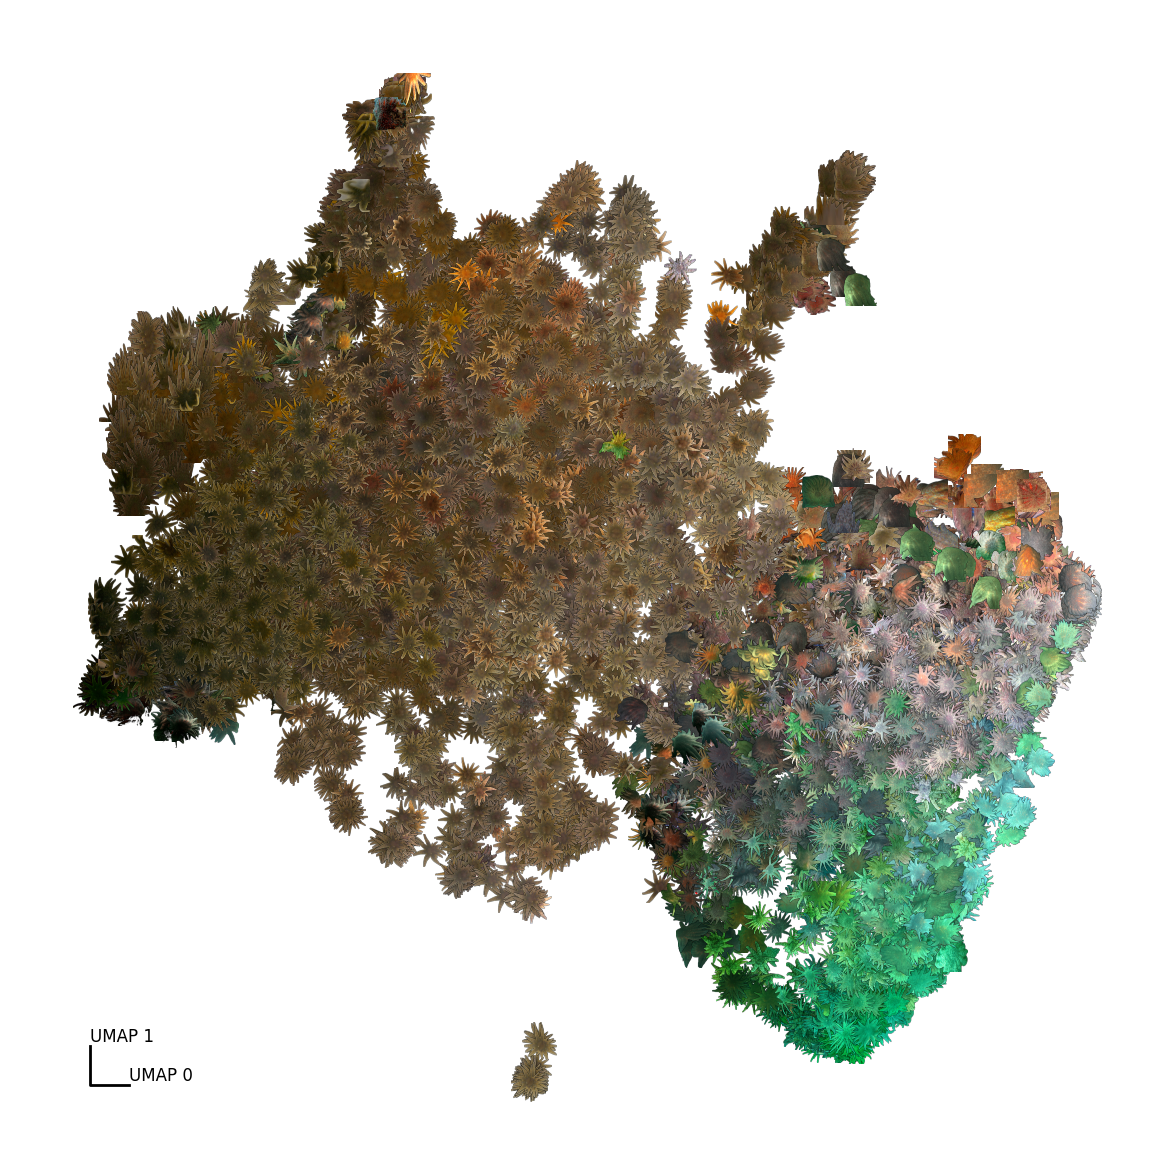

In [217]:
fig, ax = plt.subplots(figsize=(15, 15))

## visualize image space with inset images
K = 25 ## space strech factor

W = 512
H = 512

eW = W / K**2
eH = H / K**2

lim_pad = 2

u1_norm = (u1 - u1.min()) / (u1.max() - u1.min())*K
u2_norm = (u2 - u2.min()) / (u2.max() - u2.min())*K

path_plot = os.path.join(dst_data_dir, 'umap_space_images_plot.png')
dpi = 600

pbar = tqdm(total=len(df), desc='Plotting images', position=0, leave=True)
for i, image in enumerate(df['masked_image']):
    x = u1_norm[i]
    y = u2_norm[i]

    extent = [x - eW / 2, x + eW / 2, y - eH / 2, y + eH / 2]

    # reshape to (W, H, 3)
    image = image.reshape(W, H, 3)

    # Convert your RGB image to RGBA
    image_w_alpha = cv2.cvtColor(image, cv2.COLOR_RGB2BGRA)
    # Set the alpha channel to 0 where all the R, G, and B channels are 0
    image_w_alpha[..., 3] = np.where(np.all(image_w_alpha[..., :3] == 0, axis=-1), 0, 255).astype(np.uint8)
    # Now, plot the image with transparency
    ax.imshow(image_w_alpha, extent=extent, origin='lower', zorder=1)

    ax.scatter(x, y, c='r', s=1, zorder=0)

    pbar.update(1)

pbar.close()

p_x = [0, 0, 1]
p_y = [1, 0, 0]
ax.plot(p_x, p_y, c='black', linewidth=2)
text = 'UMAP 0'
ax.text(p_x[-1], p_y[-1]+.1, text, fontsize=12)
text = 'UMAP 1'
ax.text(p_x[0], p_y[0]+.1, text, fontsize=12)

ax.set_xlim(0-lim_pad, K+lim_pad)
ax.set_ylim(0-lim_pad, K+lim_pad)

ax.axis('off')

ax.set_aspect('equal')

fig.savefig(path_plot, dpi=dpi, bbox_inches='tight')

plt.show()
plt.close()

In [245]:
del df['masked_image']
path_df = os.path.join(dst_data_dir, 'df.csv')
df.to_csv(path_df, index=False)